<div style="font-family: 'Times New Roman', Times, serif; text-align: center;">
<b>ЛАБОРАТОРНА РОБОТА №2</b><br>
<br>
<b>ПОРІВНЯННЯ МЕТОДІВ КЛАСИФІКАЦІЇ ДАНИХ</b><br>
<br>
</div>
<div style="font-family: 'Times New Roman', Times, serif;">
<i><b>Мета роботи:</b> використовуючи спеціалізовані бібліотеки та мову програмування Python дослідити різні методи класифікації даних та навчитися їх порівнювати.</i><br>
<br>
Роботу виконав студент групи ІН-401, <b>Уманський Дмитро</b>
</div>




# Імпорт бібліотек

Спершу треба імпортувати необхідні бібліотеки:
* `numpy` для математичних операцій
* `pandas` для роботи з даними
* `matplotlib` для візуалізації
* `sklearn` для роботи з моделями

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Читання файлів

## Завантаження файлів

Тепер, для комфортної роботи з даними в майбутньому, їх слід перетворити у об'єкт `DataFrame`:

In [30]:
input_file = 'income_data.txt' # Вхідний файл
df = pd.read_csv(input_file, header=None, na_values=' ?', skipinitialspace=True)

## Отримання інформації про дані
Можна також переглянути перші 5 рядків фрейму й статистичну інформацію про нього

In [31]:
df.head() # Виводимо перші 5 рядків даних

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df.info() # Інформація про дані

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Фрейм складається з $15$ колонок, в кожній по $32561$ рядків. Пропусків немає, чудово - не треба буде видаляти рядки без даних.

In [33]:
df.describe() # Статистичні дані про числові стовпці

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Попередня обробка даних

## Перетворення цільової змінної

Нашою цільовою колонкою буде колонка з доходом (під номером $14$). Переглянемо її унікальні значення

In [34]:
df.iloc[:, -1].unique() # Унікальні значення цільової змінної

array(['<=50K', '>50K'], dtype=object)

Цільова змінна має тільки два унікальних значення. Їх можна перетворити у числові значення для спрощення обрахунків.
Створимо два класи:
* `0` для доходу `'<=50K'`
* `1` для доходу `'>=50K'`

In [35]:
df.iloc[:, -1] = df.iloc[:, -1].map({'<=50K': 0, '>50K': 1})

Перевіримо, чи заміна пройшла успішно:

In [36]:
df.iloc[:, -1].unique()

array([0, 1], dtype=object)

Все змінилось, чудово.

## Виділення незалежних та цільової змінної

Тепер дані можна поділити та матрицю незалежних змінних та цільову змінну (виділити X та y):

In [37]:
# Розділення ознак (X) і міток (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int)

## Перетворення даних

Всі категоріальні дані можна перетворити у числові за допомогою `LabelEncoder` (алгоритми краще працюють на числових даних):

In [40]:
# Обробка категоріальних змінних
label_encoders = {} # Словник для збереження енкодерів
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Збереження енкодерів

Тепер числові дані треба відмасштабувати. Для цього можна скористатись `StandardScaler`:

In [41]:
# Масштабування числових даних
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Навчання моделей

## Вибір моделей

Створимо словник з моделями, які будуть використовуватись для класифікації:
* лінійний класифікатор
* класифікатор з гаусовим ядром
* з поліноміальним ядром
* з сигмоїдальним ядром

In [42]:
models = {
    'Linear SVM': SVC(kernel='linear', random_state=0),  # Використовуємо SVC з лінійним ядром
    'RBF SVM': SVC(kernel='rbf', random_state=0), # Використовуємо SVC з RBF ядром
    'Poly SVM (degree=3)': SVC(kernel='poly', degree=3, random_state=0), # Використовуємо SVC з поліноміальним ядром (степінь 3)
    'Sigmoid SVM': SVC(kernel='sigmoid', random_state=0) # Використовуємо SVC з сигмоїдальним ядром
}

## Поділ на навчальні та тестові вибірки

Обов'язково треба моділити наші дані на навчальні та тестові вибірки. Це можна зробити за допомогою `train_test_split` з розміром тестової вибірки у $20\%$

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Створення функції для навчання та оцінки моделей

Для зручності подальшого використання я вирішив зробити фунцію для одночасного навчання та оцінки моделей. Моделі оцінюються за __акуратністю, точністю, повнотою та F1-мірою__. Методи для оцінювання можна імпортувати з `sklearn`:

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """Функція для навчання та оцінки моделі"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Модель: {model.kernel}')
    print(f'Акуратність: {accuracy*100:.2f}%')
    print(f'Точність: {precision*100:.2f}%')
    print(f'Повнота: {recall*100:.2f}%')
    print(f'F1-міра: {f1*100:.2f}%')
    print('-' * 40)

## Навчання та оцінка моделей

Тепер можна використати цю функцію для навчання та оцінки усіх моделей:

In [45]:
for name, model in models.items():
    train_and_evaluate(model, X_train, y_train, X_test, y_test)

Модель: linear
Акуратність: 80.90%
Точність: 80.39%
Повнота: 80.90%
F1-міра: 77.21%
----------------------------------------
Модель: rbf
Акуратність: 84.62%
Точність: 83.81%
Повнота: 84.62%
F1-міра: 83.61%
----------------------------------------
Модель: poly
Акуратність: 84.34%
Точність: 83.56%
Повнота: 84.34%
F1-міра: 83.05%
----------------------------------------
Модель: sigmoid
Акуратність: 76.05%
Точність: 75.71%
Повнота: 76.05%
F1-міра: 75.87%
----------------------------------------


Можна помітити, що класифікатор з гаусовим ядром справився із задачою найкраще, маючи кожну оцінку вищу за $83\%$. Поліноміальний класифікатор також має дуже високі результати, близькі до гаусового. Сигмоїдальний класифікатор справився найгірше. 

# Перевірка моделей на нових даних

Тепер можна перевірити, як моделі будуть працювати із даними, які вони раніше не бачили. Для цього буде створено список з випадковою інформацією:

In [46]:
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 
              'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 
              '0', '0', '40', 'United-States']

Ці дані теж треба закодувати та змасштабувати: 

In [47]:
# Перетворення нового зразка на формат, який приймає модель
input_data_encoded = []
for i, col in enumerate(df.columns[:-1]):
    if col in label_encoders:
        input_data_encoded.append(label_encoders[col].transform([input_data[i]])[0])
    else:
        input_data_encoded.append(float(input_data[i]))

input_data_encoded = scaler.transform([input_data_encoded])

Переглянемо, до якої категорії кожна з моделей віднесла цей приклад:

In [48]:
# Передбачення кожною моделлю
print('\nРезультати передбачення для нового зразка:')
for name, model in models.items():
    predicted_class = model.predict(input_data_encoded)[0]
    print(f'{name}: {">50K" if predicted_class == 1 else "<=50K"}')


Результати передбачення для нового зразка:
Linear SVM: <=50K
RBF SVM: <=50K
Poly SVM (degree=3): <=50K
Sigmoid SVM: <=50K


Кожна з моделей віднесла новий приклад до категорії доходу `'<=50K'`, що є правильно. У вхідних даних маємо схожий приклад (рядок №$3$), тому можемо порівняти.

## Порівняння якості класифікаторів

Використаємо ще декілька алгоритмів класифікації:
* Логістична регресія або логіт-модель (LR) 
* Лінійний дискримінантний аналіз (LDA) 
* Метод k-найближчих сусідів (KNN) 
* Класифікація та регресія за допомогою дерев (CART) 
* Наївний баєсовський класифікатор (NB) 
* Метод опорних векторів (SVM)

Спочатку імортуємо їх всі:

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 

Тепер зробимо те саме, що робили до цього. Створимо словник з моделями:

In [50]:
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear')), # Використовуємо OneVsRestClassifier для багатокласової логістичної регресії
    'Decision Tree': DecisionTreeClassifier(random_state=0), # Використовуємо дерево рішень
    'K-Nearest Neighbors': KNeighborsClassifier(), # Використовуємо алгоритм найближчих сусідів
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(), # Використовуємо лінійний дискримінантний аналіз
    'Gaussian Naive Bayes': GaussianNB(), # Використовуємо наївний баєсівський класифікатор
    'Support Vector Classifier': SVC(gamma='auto') # Використовуємо SVC з автоматичним вибором параметра gamma
}

# Оцінка моделей за допомогою крос-валідації
results = []
names = []

# Використовуємо StratifiedKFold для збереження пропорцій класів у кожній складці
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.824900 (0.005285)
Decision Tree: 0.812769 (0.004371)
K-Nearest Neighbors: 0.828394 (0.008836)
Linear Discriminant Analysis: 0.814266 (0.004489)
Gaussian Naive Bayes: 0.803632 (0.004787)
Support Vector Classifier: 0.848433 (0.006860)


Оцінювання відбувалось на основі акуратності. Можна помітити, що **метод опорних векторів** впорався найкраще, маючи середню оцінку у $85\%$. На другому місці стоїть алгоритм **KNN** з оцінкою у $83\%$, а на третьому - **логістична регресія** з оцінкою у $82\%$.

На основі цього можна зобразити діаграму розмаху: 

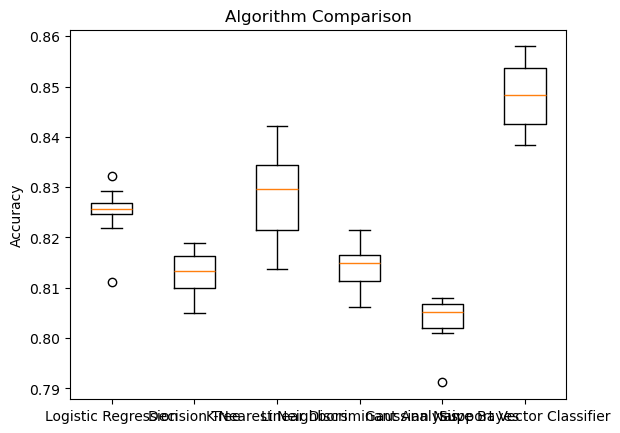

In [ ]:
plt.boxplot(results, tick_labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

Можна іще раз побачити, що найкращою моделлю виявилась SVM. Її можна оцінити іще раз окремо:

In [52]:
# Вибір моделі з найкращою точністю
best_model_index = np.argmax([result.mean() for result in results])
best_model_name = names[best_model_index]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
best_model_accuracy = best_model.score(X_test, y_test)
print(f'Найкраща модель: {best_model_name} з точністю {best_model_accuracy*100:.2f}%')

Найкраща модель: Support Vector Classifier з точністю 84.62%


З цим роботу над класифікацією даних `income_data.txt` можна вважати завершеною. Це завдання $2.1$, $2.2$ та $2.4$.

Код доступний за посиланням:
<a>https://github.com/dmuman/AI_systems/blob/main/my_projects/classification/classification.ipynb</a>